# Clustering Workshop – Completed Notebook

Use this notebook to take notes and complete the challenges in your clustering workshop.

In this workshop, we'll be looking at demographic data to identify different clusters of regions within major world cities. 

The goal is to identify naturally occurring groups within this demographic data. As a result, we should be able to better understand which parts of a city are similar and which are not.

The figure below shows the result a result of similar analysis on demographic data for London. Parts of the city that are most similar to each other share the same colour.

<img src="https://assets.decoded.com/managed/c6b02ff5-3899-40e5-8888-ad845beee77e_fxxqkyv_sev6lfd4.jpg" alt="London map" width="500"/>


## Import libraries

In [1]:
# pandas for dataframe manipulation
import pandas as pd

# Seaborn and matplotlib for plotting results
import seaborn as sns
import matplotlib.pyplot as plt

# import function to scale our data so that we can perform sensible clustering
from sklearn.preprocessing import scale

# KMeans to provide the implementation of our clustering algorithm
from sklearn.cluster import KMeans

## About the data

For this workshop, we'll be using the dataset available at decd.co/da-resources in the clustering section. 

In this spreadsheet, you will find demographic data for three major world cities: London, Hong Kong, and New York. 

Each city is broken into several administrative districts. (London, for example, is made up of 33 boroughs, while Hong Kong is divided into 18 districts.) 

For each area in a city, you will find several different demographic features. These include things like population density, average salary, and average income.

## Sourcing the data

Before continuing, take a moment to choose which of the three cities you'd like to study for the rest of this workshop.

> In this section, we load in pre-prepared data for this exercise for the city of London. This dataset includes demographic data for each borough in the city.

In [2]:
# Challenge 1: Load the data for your chosen city into this notebook using pandas
london_df = pd.read_csv('LDN_demographic_data.csv')
# Challenge 2: Check your data has imported correclty using .head()
london_df.head()
# Challenge 3: Add a text block above this code block explaining this section's purpose and what this code does
# See above

,Borough,Mean age (2017),"Average income (£, 2015)"
0,Barking and Dagenham,32.9,33018
1,Barnet,37.3,30900
2,Bexley,39.0,29664
3,Brent,35.6,29987
4,Bromley,40.2,30444


## Exploring and transforming the data

It's important to spend time understanding your data before doing your analysis. Take a few moments to look through the data you've imported using some of the functions built into `pandas`.

In [3]:
# Challenge 3: Explore your data using the following functions: .head(), .tail(), .info(), and .dtypes
london_df.head()

,Borough,Mean age (2017),"Average income (£, 2015)"
0,Barking and Dagenham,32.9,33018
1,Barnet,37.3,30900
2,Bexley,39.0,29664
3,Brent,35.6,29987
4,Bromley,40.2,30444


In [4]:
london_df.tail()

,Borough,Mean age (2017),"Average income (£, 2015)"
28,Sutton,38.9,27355
29,Tower Hamlets,31.4,46681
30,Waltham Forest,35.1,29352
31,Wandsworth,35.0,31968
32,Westminster,37.7,39392


In [5]:
london_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
Borough                     33 non-null object
Mean age (2017)             33 non-null float64
Average income (£, 2015)    33 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 920.0+ bytes


In [6]:
london_df.dtypes

Borough                      object
Mean age (2017)             float64
Average income (£, 2015)      int64
dtype: object

In [7]:
# Challenge 4: Find another function you can use to explore your data online
london_df.describe()

,Mean age (2017),"Average income (£, 2015)"
count,33.000000,33.000000
mean,36.375758,32586.969697
std,2.487849,5554.108240
min,31.400000,26230.000000
25%,35.000000,29664.000000
50%,36.200000,30900.000000
75%,37.700000,33717.000000
max,43.200000,54034.000000


In [8]:
london_df.columns

Index(['Borough', 'Mean age (2017)', 'Average income (£, 2015)'], dtype='object')

In [9]:
london_df.shape

(33, 3)

In [10]:
# Challenge 5: Add a text block beneath this code block describing what you've found in this data

> From exploring our data, we can tell that we have two features for each borough: mean age and average income. The mean age is between 31.4 and 43.2, and the average income is between £26,230 and £54,034. There are 13 boroughs in total and no missing values. 

### Visualising the data

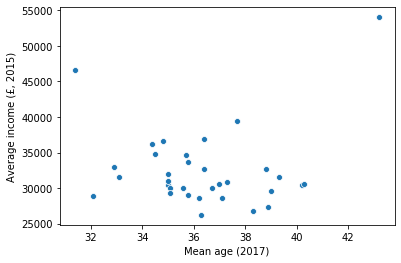

In [11]:
# Challenge 6: Import the seaborn library into this notebook
# Challenge 7: Create a scatter plot of two variables in your dataset using seaborn (support resource below)
sns.scatterplot(x = london_df['Mean age (2017)'], y = london_df['Average income (£, 2015)'])
# Challenge 8: Add a text block beneath this code block describing what your visualisation shows

This scatter plot shows two outliers. This may be important for us to know later. There doesn't seem to be any other correlation between the two variables.

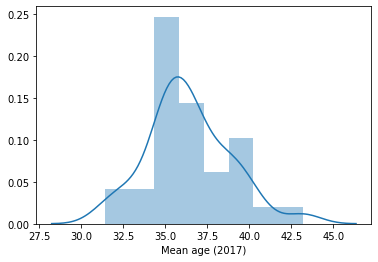

In [12]:
# Challenge 9: (Optional) Try creating another visualisation using seaborn and describe what it shows
sns.distplot(london_df['Mean age (2017)'])

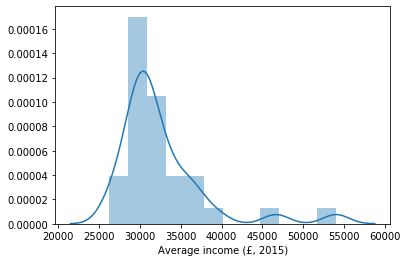

In [13]:
sns.distplot(london_df['Average income (£, 2015)'])

(See [Seaborn's official scatterplot documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) for support on Challenge 7.)

### Scaling the data

Before running any clustering analysis, it is important to [_scale_ your data](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

Scaling is trivial to do using the [Scale method](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) from [scikit-learn](https://scikit-learn.org/stable/index.html).

> scikit-learn (or sklearn) is the library most commonly used for machine learning in Python. It also has great documentation. Check out its [resources for clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means).

from sklearn.preprocessing import scale

In [14]:
# Challenge 10: Import the scale method from sklearn.preprocessing in your libraries section
# Challenge 11: Uncomment and alter the code below to scale two features from your dataset

In [15]:
data_scaled = scale(london_df[['Mean age (2017)', 'Average income (£, 2015)']])

In [16]:
data_scaled

array([[-1.41875497,  0.07880893],
       [ 0.37726266, -0.308443  ],
       [ 1.07117856, -0.53443139],
       [-0.31665325, -0.47537455],
       [ 1.56100155, -0.39181736],
       [ 0.00989541,  0.80138667],
       [ 2.78555902,  3.92134278],
       [ 0.25480691, -0.35817507],
       [-0.07174175, -0.71854975],
       [-0.03092317, -1.16229878],
       [-0.56156474, -0.38212692],
       [-1.33711781, -0.18667256],
       [-0.27583466,  0.37756704],
       [-0.52074616, -0.45983328],
       [ 0.78544848, -1.06356599],
       [ 1.60182013, -0.3649401 ],
       [ 0.00989541,  0.01719236],
       [-0.23501608,  0.20661304],
       [-0.6432019 ,  0.74818067],
       [ 1.1936343 , -0.19435178],
       [ 0.29562549, -0.7225722 ],
       [-0.76565765,  0.41413474],
       [-0.56156474, -0.30259217],
       [ 0.13235116, -0.46568411],
       [-1.74530363, -0.67667974],
       [-0.23501608, -0.63791797],
       [ 0.98954139,  0.01335275],
       [-0.80647623,  0.66754889],
       [ 1.03035997,

## Modelling with k-means

To run the k-means algorithm, you can use the KMeans method from scikit-learn.

In [17]:
# Challenge 10: Familiarise yourself with the KMeans scikit-learn documentation at: 
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# Challenge 11: Create the KMeans model object using the commented code below (choose a reasonable value for 
# n_clusters based on your visualisation above)

In [18]:
model = KMeans(n_clusters = 6, random_state= 123)

In [19]:
# Challenge 12: Fit the model using the code below
model.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [20]:
# Challenge 13: Explore the labels in your model using the code below
model.labels_

array([5, 4, 0, 4, 0, 1, 2, 4, 4, 4, 4, 5, 1, 4, 0, 0, 4, 1, 1, 0, 4, 1,
       4, 4, 5, 4, 0, 1, 0, 3, 4, 4, 1], dtype=int32)

In [21]:
# Challenge 14: Add the labels to your original dataframe using a version of the code below
london_df["cluster"] = model.labels_.astype(int)

In [22]:
# Challenge 15: View your original dataframe and notice how it has changed
london_df

,Borough,Mean age (2017),"Average income (£, 2015)",cluster
0,Barking and Dagenham,32.9,33018,5
1,Barnet,37.3,30900,4
2,Bexley,39.0,29664,0
3,Brent,35.6,29987,4
4,Bromley,40.2,30444,0
5,Camden,36.4,36970,1
6,City of London,43.2,54034,2
7,Croydon,37.0,30628,4
8,Ealing,36.2,28657,4
9,Enfield,36.3,26230,4


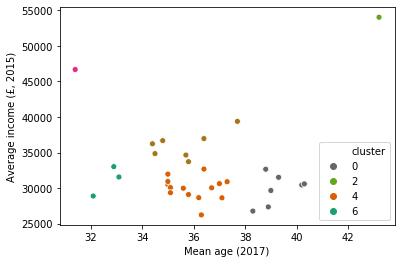

In [23]:
# Challenge 16: Copy your scatterplot from above and add hue = df['cluster'] to your list of arugments to visualise
# your clusters
sns.scatterplot(x = london_df['Mean age (2017)'], 
                y = london_df['Average income (£, 2015)'],
                hue = london_df['cluster'],
                palette = 'Dark2_r'
               )

## Evaluating the results

There are two ways we can evaluate the results of our analysis:
1. Statistical methods
2. Domain knowledge

Statistical methods can give us a numeric understanding about the quality of our clusters. Our domain knowledge can help to interpret whether there are other factors that may not necessarily be explained by the numbers.

### Within-cluster sum of squares
A common statistical method to interpret our results is the within sum of squares method. This is simply the sum of the squared deviations from each observation and the cluster centroid.

The idea is that, in general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares. Clusters that have higher values exhibit greater variability of the observations within the cluster.

In [24]:
# Challenge 17: Use the .inertia_ attribute on your model to find the WSS value for your analysis
model.inertia_
# Challenge 18: Try using different values for k (n_clusters) in your algorithm above to see if you can reduce 
# this number

6.626725336602393

### Elbow method
You can use the within-cluster sum of squares to establish what the ideal number of clusters is.

It's helpful to start your analysis by plotting this value for different values of _k_ on a graph. Often, you will see a kink (or elbow) in the chart. This is often the optimum value for k.

In [25]:
# Challenge 19: Run the code below to identify the optimum number of clusters for this dataset and your chosen features.

In [26]:
# Idea: peform k-means clustering for various k, and compute the WSS each time

# create a list of the different values of k to test. Could also use: list(range(1,10))
num_clusters = [1,2,3,4,5,6,7,8,9,10]

# create a kmeans model for each value of k. Could use a regular for loop, but let's use a "list comprehension"!
kmeans_list = [KMeans(n_clusters = i) for i in num_clusters]

# For each value of k, fit the model with our data and use the "inertia" method of KMeans to compute the WSS
scores = [kmeans_list[i-1].fit(data_scaled).inertia_ for i in num_clusters]

# Optional 
# We can choose to normalise the scores with respect to the score for k=1 (the highest score)
scores_normalised = scores/scores[0]

Text(0.5, 1.0, 'Elbow test')

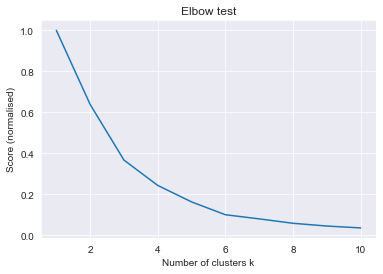

In [27]:
# We can choose to set a grid
sns.set_style('darkgrid')

# Use the lineplot function from seaborn
sns.lineplot(num_clusters, scores_normalised)

# Add a title and axis labels
plt.xlabel("Number of clusters k")
plt.ylabel("Score (normalised)")
plt.title("Elbow test")

## Conclusion

Now that you have your results, it's important to summarise them in a way that people will easily understand.

In [28]:
# Challenge 20: Spend some time writing up a summary of your process and results. Write it as you would if you were
# going to send it to a senior leadership team.

Another way that is helpful to share your results is with a compelling visualisation. The code below shows how you could create a visualisation for London. It is optional to complete.

In [29]:
# Optional: Tweak and run the following code to plot your clusters on a map.
# You will need to download the relevant shapefiles from decd.co/da-resources 
# and run adjust the code as needed. The example below is for London.

# Import the relevant libraries
import matplotlib.pyplot as plt

########################################################################################################
### Make sure to install geopandas using conda install geopandas if it is not already on your device ###
### You can do this via the terminal, cmd prompt, or conda prompt ######################################
########################################################################################################
import geopandas as gpd # Geo dataframes and plotting
from shapely import wkt # Converts shape data stored as strings to geometry objects, so they can be plotted

%matplotlib inline

In [30]:
# Load shape data from a file

map_df = pd.read_csv("LDN_MAP_DATA.csv")

# Convert the shapes (stored as strings) to geometry objects

map_df["geometry"] = map_df["geometry"].apply(wkt.loads)

# Convert the df to a GeoPandas df, so it can be plotted

map_df = gpd.GeoDataFrame(map_df, geometry='geometry')

In [31]:
# Merge your existing dataset with the one you've just created
merged = map_df.set_index('NAME').join(london_df.set_index('Borough'))
merged.head()

,HECTARES,geometry,Mean age (2017),"Average income (£, 2015)",cluster
NAME,,,,,
Kingston upon Thames,3726.117,"POLYGON ((516401.600 160201.800, 516407.300 16...",37.1,28635,4
Croydon,8649.441,"POLYGON ((535009.200 159504.700, 535005.500 15...",37.0,30628,4
Bromley,15013.487,"POLYGON ((540373.600 157530.400, 540361.200 15...",40.2,30444,0
Hounslow,5658.541,"POLYGON ((521975.800 178100.000, 521967.700 17...",35.8,33717,1
Ealing,5554.428,"POLYGON ((510253.500 182881.600, 510249.900 18...",36.2,28657,4


(500648.735, 564876.965, 153596.64500000002, 203188.055)

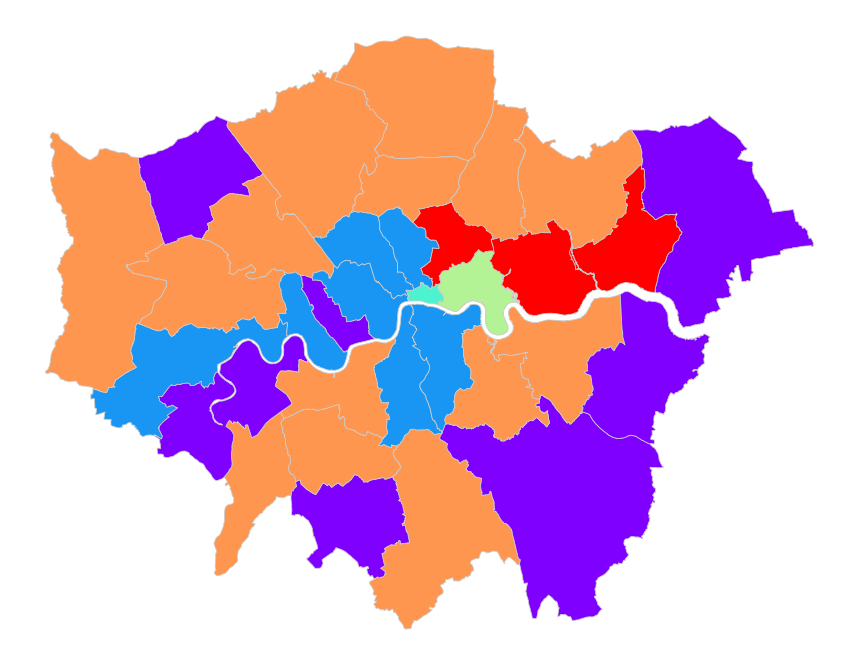

In [32]:
# Set a variable that will call whatever column we want to visualise on the map
variable = 'cluster'
# Set the range for the choropleth
vmin, vmax = 120, 220
# Create a figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))
# Plot the figure
merged.plot(variable, cmap='rainbow', linewidth=0.8, ax=ax, edgecolor='0.8')
# Turn off the axes
ax.axis('off')


In [33]:
# add a title
ax.set_title('Similar boroughs in London', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: London Datastore',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Save the figure as a .png file
fig.savefig('london_clusters.png', dpi=300)